In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:/Users/Arunita.000/Desktop/MachineLearning_Classification_Clustering_Regression/ProductClustering")

In [3]:
columns=["S.No","Product Title","Vendor ID","Cluster ID","Cluster Label","Category ID","Category Label "]
df=pd.read_csv("skroutz_aggregate1.csv", names=columns)

In [4]:
df.head()

,S.No,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,amd ryzen 5 1600 box epexergastis me wraith sp...,1030,1,AMD Ryzen 5 1600 Box,696,CPUs
1,2,amd ryzen 5 1600,3964,1,AMD Ryzen 5 1600 Box,696,CPUs
2,3,amd ryzen 5 1600 box pliromi ke se eos 36 dosis,4814,1,AMD Ryzen 5 1600 Box,696,CPUs
3,4,amd ryzen 5 1600 yd1600bbaebox,4835,1,AMD Ryzen 5 1600 Box,696,CPUs
4,5,amd ryzen 5 1600 box yd1600bbaebox,2976,1,AMD Ryzen 5 1600 Box,696,CPUs


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137859 entries, 0 to 137858
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   S.No             137859 non-null  int64 
 1   Product Title    137859 non-null  object
 2   Vendor ID        137859 non-null  int64 
 3   Cluster ID       137859 non-null  int64 
 4   Cluster Label    137859 non-null  object
 5   Category ID      137859 non-null  int64 
 6   Category Label   137859 non-null  object
dtypes: int64(4), object(3)
memory usage: 7.4+ MB


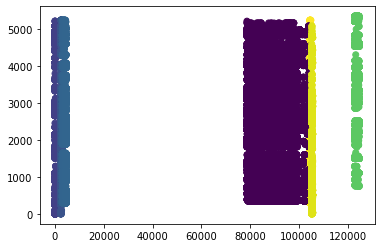

In [6]:
plt.scatter(df["Cluster ID"], df["Vendor ID"], c=df["Category ID"])
plt.show()

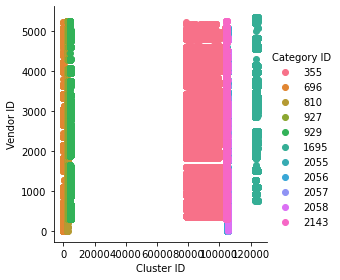

In [7]:
sns.FacetGrid(df, hue="Category ID", height=4) \
   .map(plt.scatter, "Cluster ID", "Vendor ID") \
   .add_legend();

In [8]:
df["Category ID"].unique()

array([ 696,  810,  927,  929, 2143,  355, 2055, 2056, 2057, 2058, 1695],
      dtype=int64)

In [9]:
df["Cluster ID"].unique()

array([     1,      2,      3, ..., 124629, 124630, 124631], dtype=int64)

In [10]:
len(df["Vendor ID"].unique())

624

In [11]:
df["Vendor ID"].value_counts()

702     5681
728     5508
945     5211
2661    5178
555     5116
        ... 
2749       1
446        1
4994       1
1600       1
1663       1
Name: Vendor ID, Length: 624, dtype: int64

In [12]:
df["Cluster ID"].value_counts()

104387    100
104393     98
104482     96
104395     95
104520     95
         ... 
89274       1
122997      1
100472      1
83129       1
87189       1
Name: Cluster ID, Length: 31096, dtype: int64

In [13]:
len(df["Category ID"].unique())

11

In [14]:
df.shape

(137859, 7)

In [15]:
df.drop(df.index[49539:127884],axis=0,inplace=True)

In [16]:
#sns.swarmplot(x="Category ID", y="Cluster ID", data=df)
#plt.grid()

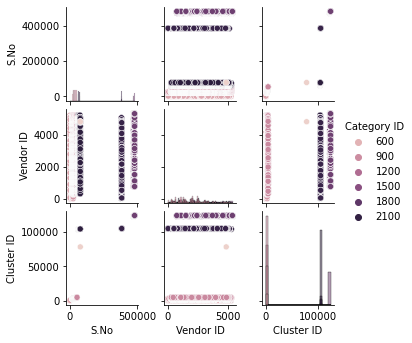

In [17]:
sns.pairplot(df, hue="Category ID", diag_kind="hist", height=1.6);

In [18]:
# split data into features (X) and labels (y)
X = df.iloc[:,[3]]
y = df.iloc[:,[5]]
print(X.sample(5))
print(y.sample(5))

        Cluster ID
20323         3539
41582       104511
1483           135
33848         4434
131884      105493
        Category ID
38521          2143
132212         1695
20568           927
3816            810
23617           927


In [19]:
df["Category ID"].value_counts()

927     16177
2143    13595
929     10858
810      7002
1695     5864
696      1906
2056     1680
2055     1133
2057      903
2058      395
355         1
Name: Category ID, dtype: int64

In [20]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,Cluster ID
32592,-0.786028
12792,-0.808626
52190,1.149006
50552,1.146840
46921,1.138426


In [21]:
# K-Means Clustering
from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [22]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

0.9853163367692244

In [23]:
contingency_matrix1 = metrics.cluster.contingency_matrix(y,y_cluster_kmeans)
contingency_matrix1

array([[    0,     1,     0],
       [ 1906,     0,     0],
       [ 7002,     0,     0],
       [16177,     0,     0],
       [10858,     0,     0],
       [    0,     0,  5864],
       [    0,  1133,     0],
       [    0,  1680,     0],
       [    0,   903,     0],
       [    0,   395,     0],
       [    0, 13595,     0]], dtype=int64)

In [24]:
df.shape

(59514, 7)

In [25]:
np.amax(contingency_matrix1, axis=0)

array([16177, 13595,  5864], dtype=int64)

In [26]:
x = np.sum(np.amax(contingency_matrix1, axis=0)) #Sum of max. elements from each row
x

35636

In [27]:
y = np.sum(contingency_matrix1)  #total sum of all elements in contingency matrix
y

59514

In [28]:
purity = float(x)/float(y) 
purity

0.5987834795174245

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


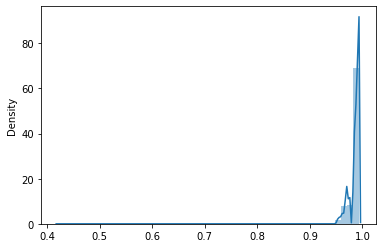

In [29]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

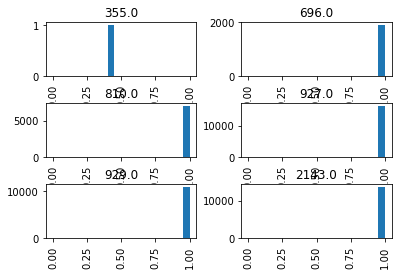

In [30]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Category ID'] = df['Category ID']
df_scores.hist(by='Category ID', column='SilhouetteScore', range=(0,1.0), bins=20);


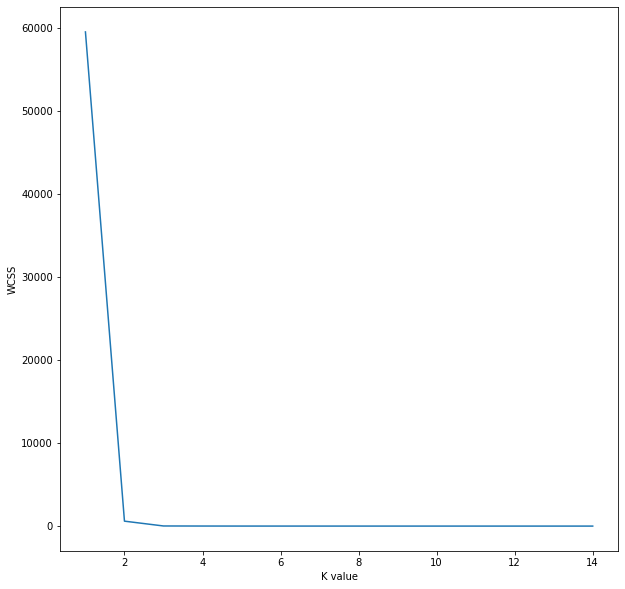

In [31]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X_scaled)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(X_scaled, KMeans(n_clusters =n_cluster).fit_predict(X_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [ ]:
#Model Build   (K-means)
kmeansmodel = KMeans(n_clusters= 3, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [ ]:
nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

In [ ]:
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score

In [ ]:
km.inertia_

In [ ]:
km.cluster_centers_

# Agglomerative Cluster